# Analyzing the Ford Gobike Dataset
## by Abdullah

## Investigation Overview

In this investigation I'm going to to look when Users start renting their bikes Also, how long their trip is affected by the users age and if the user gender is related to the user age and the trip duration.

## Dataset Overview

Ford Gobike Datasets a public bicycle sharing system represent trips taken by customers of the Ford Gobike service for the month of Feberaurary of 2019. <br>Currently has over 2,600 bicycles in 262 stations. Datasets consist of 16 columns and 183412 rows


## Assoiacated Variables
<br>duration_sec: Trip Duration (seconds).
<br>start_time: Start Time and Date.
<br>end_time: End Time and Date
<br>start_station_id: Start Station ID
<br>start_station_name: Start Station Name
<br>start_station_latitude: Start Station Latitude
<br>start_station_longitude: Start Station Longitude
<br>end_station_id: End Station ID
<br>end_station_name: End Station Name
<br>end_station_latitude: End Station Latitude
<br>end_station_longitude: End Station Longitude
<br>bike_id: Bike ID
<br>user_type: User Type (Subscriber or Customer)
<br>member_birth_year: Member Year of Birth
<br>member_gender: Member Gender
<br>bike_share_for_all_trip: members  "Bike Share for All" program for low-income residents

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#read the Ford Gobike dataset
fordgobike_data=pd.read_csv('201902-fordgobike-tripdata.csv')


In [3]:
#Check duplicates 
sum(fordgobike_data.duplicated())

0

In [4]:
#Check the Null roes
fordgobike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
#Sum of the Null rows
fordgobike_data.isnull().sum().sum()

17318

In [6]:
#Drop the Null rows
fordgobike_data.dropna(axis=0,inplace=True)

In [7]:
fordgobike_data.isnull().sum().sum()

0

In [8]:
#Drop the unneceesary Columns for the Visualization 
fordgobike_data.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','bike_id'], axis=1, inplace=True)

In [9]:
#Rrnae the column bike_share_for_all_trip to Enrolled_Bike_Share_Program to make the name more understandable
fordgobike_data.rename(columns={'bike_share_for_all_trip':'Enrolled_in_Bike_Share_Program'},inplace=True)

In [10]:
#Change the data type of the variable if required
fordgobike_data['start_time']=fordgobike_data['start_time'].astype('datetime64')
fordgobike_data['end_time']=fordgobike_data['end_time'].astype('datetime64')
fordgobike_data['start_station_id']=fordgobike_data['start_station_id'].astype('int64')
fordgobike_data['end_station_id']=fordgobike_data['end_station_id'].astype('int64')
fordgobike_data['member_birth_year']=fordgobike_data['member_birth_year'].astype('int64')


In [11]:
#Create a new variable with the member_age instead of the birth_year to see easier how affect the member_age
fordgobike_data['member_age']=2021-fordgobike_data['member_birth_year']

In [12]:
#Sort the start_time variable to check the first day and the last day of which data are collected
fordgobike_data_sorted_date=fordgobike_data.sort_values('start_time')

In [13]:
# First day 
fordgobike_data_sorted_date[:1]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,Enrolled_in_Bike_Share_Program,member_age
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24,Spear St at Folsom St,37,2nd St at Folsom St,Subscriber,1989,Male,No,32


In [14]:
# Last day
fordgobike_data_sorted_date[-1:]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,Enrolled_in_Bike_Share_Program,member_age
15,208,2019-02-28 23:59:18.548,2019-03-01 00:02:47.228,349,Howard St at Mary St,60,8th St at Ringold St,Subscriber,1993,Male,Yes,28


In [15]:
# Seperate the start time and creat a new variable with the start date
fordgobike_data['start_day']=fordgobike_data['start_time'].dt.day

In [16]:
#Change the data type of the start_day to intger
fordgobike_data['start_day']=fordgobike_data['start_day'].astype('int64')


In [17]:
# Function to check if the user rent the bike in the weekend or not 
def Weekend(fordgobike_data):
    if fordgobike_data['start_day'] == 2 or fordgobike_data['start_day']== 3 or fordgobike_data['start_day']== 9 or fordgobike_data['start_day']== 10 or  fordgobike_data['start_day']==16 or  fordgobike_data['start_day']==17 or  fordgobike_data['start_day']==23 or  fordgobike_data['start_day']==24:
        return 'Yes'
    else:
        return 'No'
        


In [18]:
# Apply the function in the new variable weekend
fordgobike_data['Weekend'] = fordgobike_data.apply(Weekend, axis=1)

In [19]:
def Weekday(fordgobike_data):
    if fordgobike_data['start_day'] == 4 or fordgobike_data['start_day']== 11 or fordgobike_data['start_day']== 18 or fordgobike_data['start_day']== 25 :
        return 'Monday'    
    elif fordgobike_data['start_day'] == 5 or fordgobike_data['start_day']== 12 or fordgobike_data['start_day']== 19 or fordgobike_data['start_day']== 26:
        return 'Tuesday'
    elif fordgobike_data['start_day'] == 6 or fordgobike_data['start_day']== 13 or fordgobike_data['start_day']== 20 or fordgobike_data['start_day']== 27:
        return 'Wednesday'

    elif fordgobike_data['start_day'] == 7 or fordgobike_data['start_day']== 14 or fordgobike_data['start_day']== 21 or fordgobike_data['start_day']== 28:
        return 'Thursday'

    elif fordgobike_data['start_day'] == 1 or fordgobike_data['start_day']== 8 or fordgobike_data['start_day']== 15 or fordgobike_data['start_day']== 22:
        return 'Friday'
        
    elif fordgobike_data['start_day'] == 2 or fordgobike_data['start_day']== 9 or fordgobike_data['start_day']== 16 or fordgobike_data['start_day']== 23:
        return 'Saturday'
        
    elif fordgobike_data['start_day'] == 3 or fordgobike_data['start_day']== 10 or fordgobike_data['start_day']== 17 or fordgobike_data['start_day']== 24:
        return 'Sunday'


In [20]:
fordgobike_data['weekday'] = fordgobike_data.apply(Weekday, axis=1)

## Distribution of the users Age

### Increasing the number of users as the increase of the user Age starting from age 20 years old till the peak with maximum nuber of user at age about 30 years old and then start to decrease again and almost there are no users above 80 years old.

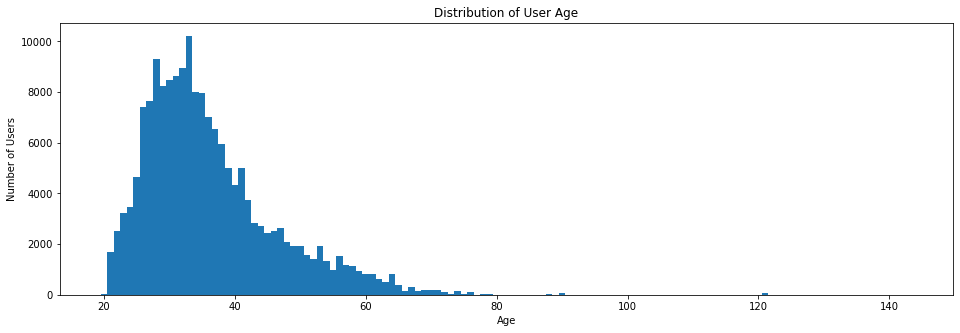

In [21]:
plt.figure(figsize=[16, 5])
plt.bar(data = fordgobike_data, x = fordgobike_data['member_age'].value_counts().keys(), height=fordgobike_data['member_age'].value_counts(),width=1)
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

##  

## Duration of the Bike trip by user age

### Most of the durations are less than 20000 sec and Duration of the bike trip start to decrease at age above 50 years old

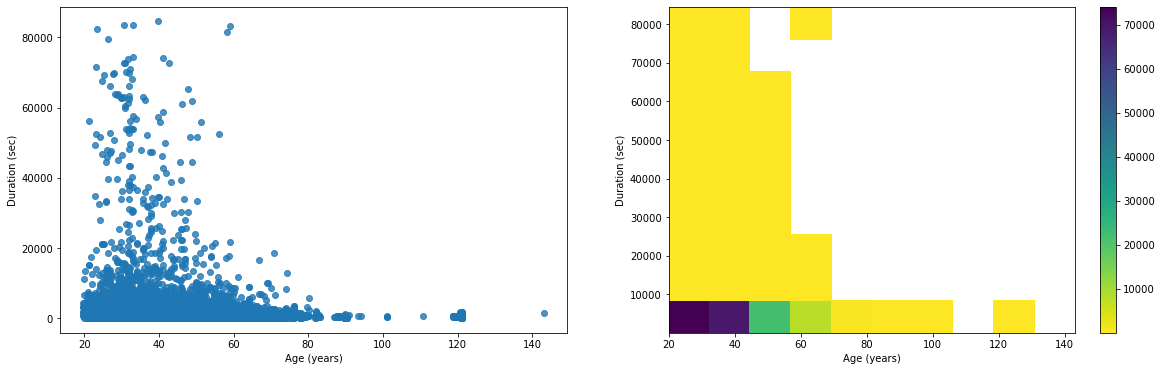

In [22]:
plt.figure(figsize=[20, 6])
plt.subplot(1, 2, 1)
sb.regplot(data=fordgobike_data,x='member_age',y='duration_sec',fit_reg=False,truncate=False, x_jitter=0.3)
plt.xlabel('Age (years)')
plt.ylabel('Duration (sec)');


plt.subplot(1, 2, 2)
plt.hist2d(data = fordgobike_data, x = 'member_age', y = 'duration_sec', cmin=2, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Age (years)')
plt.ylabel('Duration (sec)');

##  

## Duration of the Bike trip over the user Age by user Gender

###  It seems that the Men gender at age between 20 and 50 yers old spent more time in their bike trip than Female gender at the same age period

In [23]:
np.random.seed(2121)
fordgobike_data_columns=['duration_sec','member_gender','member_age']
fordgobike_data_sample=np.random.choice(fordgobike_data.shape[0],200,replace=False)
fordgobike_data_subset=fordgobike_data.reindex(columns =fordgobike_data_columns)

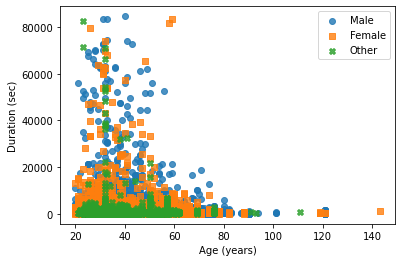

In [24]:
member_gender = [['Male', 'o'],
             ['Female', 's'],
             ['Other','X']]

for ttype, marker in member_gender:
    plot_data = fordgobike_data_subset.loc[fordgobike_data_subset['member_gender']==ttype]
    sb.regplot(data = plot_data, x = 'member_age', y = 'duration_sec',fit_reg=False, marker = marker)
    
plt.legend(['Male','Female','Other'])
plt.xlabel('Age (years)')
plt.ylabel('Duration (sec)');

##  

## Duration of the Bike trip over the user Age by user Gender

### Both Customer users and Suscriber User showing similar distribution of the age and as expected Suscriber represent more Users than Customers


In [25]:
np.random.seed(2121)
fordgobike_data_columns=['duration_sec','user_type','member_age']
fordgobike_data_sample=np.random.choice(fordgobike_data.shape[0],200,replace=False)
fordgobike_data_subset=fordgobike_data.reindex(columns =fordgobike_data_columns)


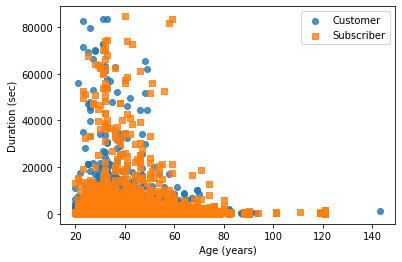

In [26]:
user_type = [['Customer', 'o'],
               ['Subscriber', 's']]

for ttype, marker in user_type:
    plot_data = fordgobike_data_subset.loc[fordgobike_data_subset['user_type']==ttype]
    sb.regplot(data = plot_data, x = 'member_age', y = 'duration_sec',fit_reg=False, marker = marker)
    
plt.legend(['Customer','Subscriber'])
plt.xlabel('Age (years)')
plt.ylabel('Duration (sec)');

##  

## Count of bike-users by weekday type 

### Only 16.5 precent of the users started their riding in the weekend and the other during druing the week, That was not expecting as the people in the weekend have more time. The busiest day is Thursday which more users choosed this day to start their riding.

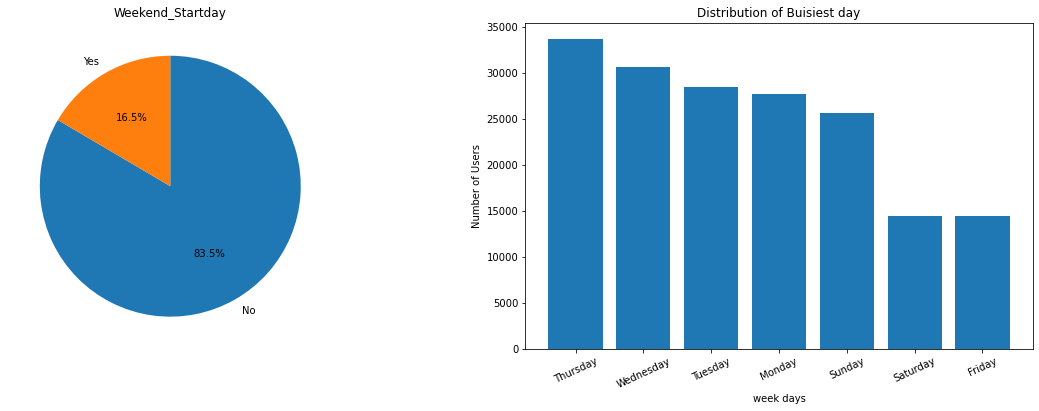

In [27]:
plt.figure(figsize=[20, 6])
plt.subplot(1, 2, 1)
sorted_counts =fordgobike_data['Weekend'].value_counts()
plt.pie(sorted_counts ,labels=sorted_counts.index,autopct='%1.1f%%',startangle=90 , counterclock = False)
plt.title('Weekend_Startday');
           
plt.subplot(1, 2, 2)
x=fordgobike_data['weekday'].unique()
y=fordgobike_data['weekday'].value_counts()
plt.bar(x,y)
plt.xlabel('week days')
plt.ylabel('Number of Users')
plt.title('Distribution of Buisiest day')
plt.xticks(rotation=25);

##    

!jupyter nbconvert Ford_GoBike_Visualization.ipynb --to slides --post serve --template output_toggle


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [32]:
!jupyter nbconvert Ford_GoBike_Visualization.ipynb --to slides --no-input


[NbConvertApp] Converting notebook Ford_GoBike_Visualization.ipynb to slides
[NbConvertApp] Writing 446123 bytes to Ford_GoBike_Visualization.slides.html
